## 4. Vensl á heiltölum (25 stig)

**Búið til vensl á mengi heiltalnanna $A = \{1, 2, 3, 4\}$ með fylki í `Python` eða `R` samkvæmt
eftirfarandi leiðbeiningum:**

1. Notið afmælisdagana ykkar til að setja slembifræ (e. random seed).
2. Búið til $4 \times 4$ fylki með slembibreyttum gildum sem eru 0 eða 1.
3. Forritið virkni sem skoðar eiginleika venslanna: athugið hvort þau
   séu sjálfhverf, samhverf, andsamhverf, og gegnvirk.
4. Sannreynið niðurstöður forritsins með því að skoða venslin myndrænt með örvaneti.

Athugið, þið þurfið að uppfæra `README` skjalið til að útskýra hvernig eigi að keyra kóðann ykkar
(og hvaða pakka þarf að setja upp, ef við á). Þar sem þið eruð að endurtaka þetta fyrir allar
afmælisdaga hópmeðlima þá er ráðlagt að setja upp fall sem tekur inn dagsetninguna og skilar
niðurstöðum.

### Python Kóði

```python
# Búa til slembifræ/seed út frá dagsetningunni
seed = int(f"{dd:02d}{mm:02d}{yyyy}")
np.random.seed(seed)

# Búa til 4x4 slembifylki með 0 eða 1
fylki = np.random.randint(0, 2, size=(4, 4))

# Endirskrifa dagssetninguna á formið "dd-mm-yyyy"
formatted_date = f"{dd:02d}-{mm:02d}-{yyyy}"

# Prenta niðurstöður:
print(f"Fylkið fyrir dagsetninguna {formatted_date} og seed {seed}:")
print(fylki)
print()
```

Byrjum á því að búa til fall sem að skoðar eiginleika venslanna: athugið hvort það séu sjálfhverf, samhverf, andsamhverf, og gegnvirk.

**Sjálfhverf:** Vensl eru samhverf er fyrir öll $i$, þá er $R(i,i) = 1$ (þ.e. allir í fylkinu hafa vensl við sjálfan sig)

**Samhverf:** Vensli eru samhverf ef fyrir öll $i,j$ þá gildir að $R(i,j) = R(j,i)$

**Andsamhverf:** Vensli eru andsamhverf ef fyrir öll $i,j$, ef $R(i,j) = 1$ og $i \neq j$ þá er $R(j,i) = 0$.

**Gegnvirk:** Vensl eru gegnvirk ef $R(i,j) = 1$ og $R(j,k) = 1$ þýðir að (R(i,k) = 1)

In [25]:

def sjalfhverft(fylki):
    # Athugar hvort fylkið sé sjálfhverft
    for i in range(len(fylki)):
        if fylki[i][i] != 1:
            return False
    return True

def samhverf(fylki):
    # Athugar hvort fylkið sé samhverft
    for i in range(len(fylki)):
        for j in range(len(fylki)):
            if fylki[i][j] != fylki[j][i]:
                return False
    return True

def adsamhverft(fylki):
    # Athugar hvort fylkið sé andsamhverft
    for i in range(len(fylki)):
        for j in range(len(fylki)):
            if i != j and fylki[i][j] == 1 and fylki[j][i] == 1:
                return False
    return True

def gegnvirkt(fylki):
    # Athugar hvort fylkið sé gegnvirkt
    n = len(fylki)
    for i in range(n):
        for j in range(n):
            for k in range(n):
                if fylki[i][j] == 1 and fylki[j][k] == 1 and fylki[i][k] != 1:
                    return False
    return True


def eiginleikar(fylki):
    # Skilar öllum eiginleikum fylkis
    return sjalfhverft(fylki), samhverf(fylki), adsamhverft(fylki), gegnvirkt(fylki)

Næst búum við til fall sem að tekur saman niðurstöður með því að skoða venslin myndrænt með örvaneti.

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

def graf(matrix):
    # Búum til tóm directed graph (örvanet)
    G = nx.DiGraph()
    
    # Mengi hnútanna er {1, 2, 3, 4}
    nodes = range(1, len(matrix) + 1)
    
    # Bætum hnútum við netið
    G.add_nodes_from(nodes)
    
    # Bætum örvum við eftir því hvort fylkið hefur vensl
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 1:
                G.add_edge(i + 1, j + 1)  # Bætum við ör frá i+1 til j+1
    
    # Teiknum netið
    pos = nx.circular_layout(G)  # Hnútarnir verða á hring fyrir betri útlit
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=15, font_weight='bold', arrowsize=20)
    plt.title("Vensl örvanet")
    plt.show()


Búum til fall sem að tekur inn afmælisdag sem slembifræ til þess að búa 4x4 fylki með slembi gildum sem eru 0 eða 1. látum það síðan kalla á hin föllin fyrir ofan til þess að athuga eiginleika þess og teiknar upp niðurstöður

In [54]:
def bua_til_fylki(dagur, manudur, ar):
    seed = int(f"{dagur:02d}{manudur:02d}{ar}")
    np.random.seed(seed)
    
    # Búa til 4x4 slembifylki með 0 eða 1
    fylki = np.random.randint(0, 2, size=(4, 4))
    
    print(f"Fylkið fyrir dagsetninguna {dagur:02d}-{manudur:02d}-{ar} með seed {seed}:")
    print(fylki)
    print()
    
    #skoðar eiginleika fylkisins
    eiginleikar(fylki)
    print("Sjálfhverf:", sjalfhverft(fylki))
    print("Samhverf:", samhverf(fylki))
    print("Andsamhverf:", adsamhverft(fylki))
    print("Gegnvirk:", gegnvirkt(fylki))
    # Teiknum vensl örvanet
    graf(fylki)
    
    

Fylkið fyrir dagsetninguna 13-12-2004 með seed 13122004:
[[0 1 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 0]]

Sjálfhverf: False
Samhverf: False
Andsamhverf: True
Gegnvirk: True


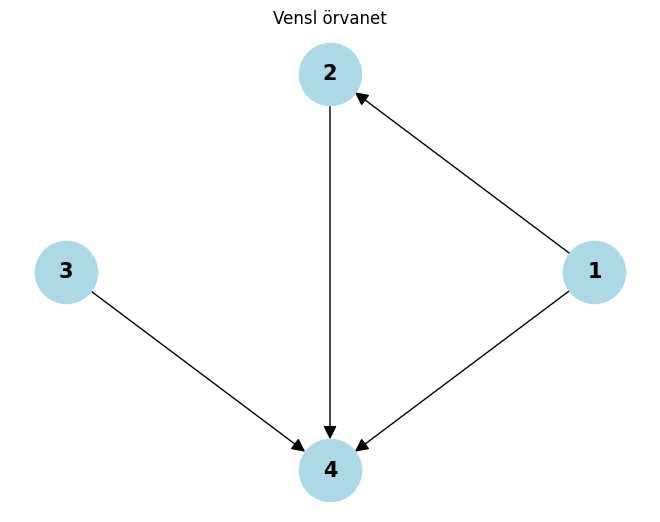

In [55]:
bua_til_fylki(13, 12, 2004)

Fylkið fyrir dagsetninguna 13-12-2004 með seed 13122004:
[[0 1 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 0]]

Sjálfhverf: False
Samhverf: False
Andsamhverf: True
Gegnvirk: True


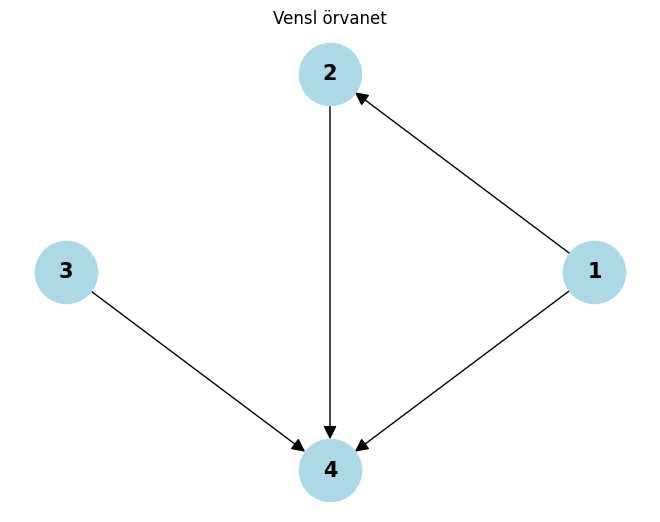

In [56]:
day, month, year = input("Sláðu inn dag, mánuð og ár: ").split()
dagur = int(day)
man = int(month)
ar = int(year)

bua_til_fylki(dagur, man, ar)